# Plotting
``` {index} Pandas: plotting
```
Plotting with pandas is very intuitive. We can use syntax:

    df.plot.*
    
where * is any plot from matplotlib.pyplot supported by pandas. Full tutorial on pandas plots can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Alternatively, we can use other plots from matplotlib library and pass specific columns as arguments:

    plt.scatter(df.col1, df.col2, c=df.col3, s=df.col4, *kwargs)
    
In this tutorial we will use both ways of plotting.

At first we will load New Zealand earthquake data and following date-time tutorial we will create date-time index:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

nz_eqs = pd.read_csv("../../geosciences/data/nz_largest_eq_since_1970.csv")
nz_eqs.head(4)

nz_eqs["hour"] = nz_eqs["utc_time"].str.split(':').str.get(0).astype(float)
nz_eqs["minute"] = nz_eqs["utc_time"].str.split(':').str.get(1).astype(float)
nz_eqs["second"] = nz_eqs["utc_time"].str.split(':').str.get(2).astype(float)

nz_eqs["datetime"] = pd.to_datetime(nz_eqs[['year', 'month', 'day', 'hour', 'minute', 'second']])
nz_eqs.head(4)

nz_eqs = nz_eqs.set_index('datetime')

Let's plot magnitude data for all years and then for year 2000 only using pandas way of plotting:

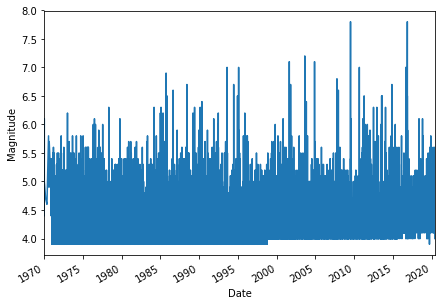

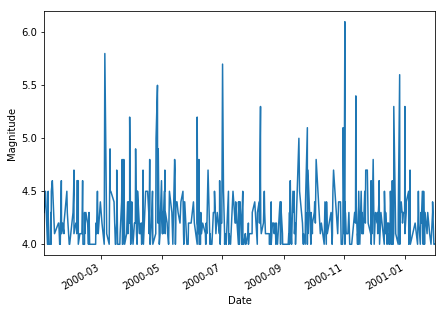

In [2]:
plt.figure(figsize=(7,5))
nz_eqs['mag'].plot()
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.show()

plt.figure(figsize=(7,5))
nz_eqs['mag'].loc['2000-01':'2001-01'].plot()
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.show()

We can calculate how many earthquakes are within each year using:

    df.resample('bintype').count()

For example, if we want to use intervals for year, month, minute and second we can use 'Y', 'M', 'T' and 'S' in the bintype argument.

Let's count our earthquakes in 4 month intervals and display it with xticks every 4 years:

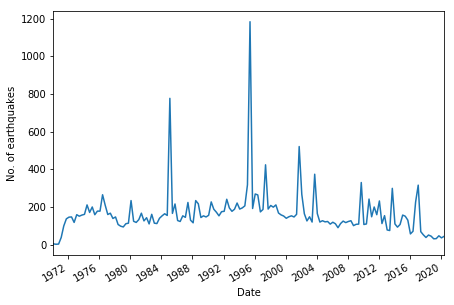

In [3]:
figure, ax = plt.subplots(figsize=(7,5))

# Resample datetime index into 4 month bins
# and then count how many 
nz_eqs['year'].resample("4M").count().plot(ax=ax, x_compat=True)

import matplotlib
# Change xticks to be every 4 years
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=4))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))

plt.xlabel('Date')
plt.ylabel('No. of earthquakes')

plt.show()

Suppose we would like to view the earthquake locations, places with largest earthquakes and their depths. To do that, we can use Cartopy library and create a scatter plot, passing magnitude column into size and depth column into colour.

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

Let's plot this data passing columns into scatter plot:

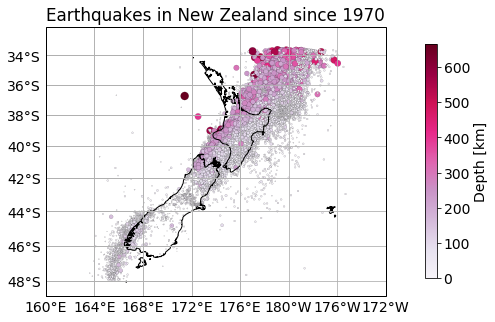

In [5]:
plt.rcParams.update({'font.size': 14})

central_lon, central_lat = 170, -50
extent = [160,188,-48,-32]

fig, ax = plt.subplots(1, subplot_kw=dict(projection=ccrs.Mercator(central_lon, central_lat)), figsize=(7,7))

ax.set_extent(extent)
ax.coastlines(resolution='10m')
ax.set_title("Earthquakes in New Zealand since 1970")

# Create a scatter plot
scatplot = ax.scatter(nz_eqs.lon,nz_eqs.lat, c=nz_eqs.depth_km,
                      s=nz_eqs.depth_km/10, edgecolor="black",
                      cmap="PuRd", lw=0.1,
                      transform=ccrs.Geodetic())

# Create colourbar
cbar = plt.colorbar(scatplot, ax=ax, fraction=0.03, pad=0.1, label='Depth [km]')

# Sort out gridlines and their density
xticks_extent = list(np.arange(160, 180, 4)) + list(np.arange(-200,-170,4))
yticks_extent = list(np.arange(-60, -30, 2))

gl = ax.gridlines(linewidths=0.1)
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(xticks_extent)
gl.ylocator = mticker.FixedLocator(yticks_extent)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()

This way we can easily see that the deepest and largest earthquakes are in the North.

# References
The notebook was compiled based on:
* [Pandas official Getting Started tutorials](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
* [Kaggle tutorial](https://www.kaggle.com/learn/pandas)